# 📊 Data Load & Initial Inspection

In this notebook, we load the data from the “Year 2010-2011” page using the `load_raw_retail_data` function in `src/data_loader.py` and perform basic inspections.

In [1]:
import sys
from pathlib import Path

In [2]:
ROOT = Path.cwd().parent
sys.path.append(str(ROOT))

In [3]:
import pandas as pd
import seaborn as sns
from src.data_loader import load_raw_retail_data

In [4]:
df_raw = load_raw_retail_data(
    file_path=str(ROOT/"data"/"online_retail_II.xlsx"),
    sheet_name="Year 2010-2011"
)

In [5]:
df = df_raw

In [6]:
df.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
# DataFrame sizes, types and memory usage
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoice      541910 non-null  object        
 1   stockcode    541910 non-null  object        
 2   description  540456 non-null  object        
 3   quantity     541910 non-null  int64         
 4   invoicedate  541910 non-null  datetime64[ns]
 5   price        541910 non-null  float64       
 6   customer_id  406830 non-null  float64       
 7   country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 126.2 MB


In [8]:
# Summary statistics (numerical and categorical)
df.describe(include="all").T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
invoice,541910.0,25900.0,573585.0,1114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stockcode,541910,4070,85123A,2313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,540456,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quantity,541910.0,NaN,NaN,NaN,9.552234,-80995.0,1.0,3.0,10.0,80995.0,218.080957
invoicedate,541910,NaN,NaN,NaN,2011-07-04 13:35:22.342307584,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
price,541910.0,NaN,NaN,NaN,4.611138,-11062.06,1.25,2.08,4.13,38970.0,96.759765
customer_id,406830.0,NaN,NaN,NaN,15287.68416,12346.0,13953.0,15152.0,16791.0,18287.0,1713.603074
country,541910,38,United Kingdom,495478,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
# Variable Name Editing (Remove lead/trail spaces, convert all to lower case)
df.columns = (
    df.columns
        .str.strip()
        .str.lower()
        .str.replace(" ", "_")            # Boşlukları alt çizgiye çevir
        .str.replace(r"[^\w_]", "", regex=True)  # Remove all but alphanumeric and _
)


In [110]:
df = df.rename(columns={
    "stockcode":    "stock_code",
    "price":    "unit_price",
    "invoicedate":  "invoice_date"
})

In [111]:
df.head()

,invoice,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Separating Germany Customers

In [112]:
df_germany = df[ df["country"] == "Germany" ].copy()
print("row count:", df_germany.shape[0])

row count: 9495


## Missing Value Analysis

In [113]:
# Missing Value Analysis
df_germany.isna().sum()

invoice         0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

## Duplicate Records & Anomalies

In [114]:
# Duplicate Records
dups = df_germany.duplicated()
print(dups.sum())

15


In [115]:
before_dup = df_germany.shape[0]
df_germany = df_germany.drop_duplicates(keep="first")
after_dup = df_germany.shape[0]

print(f"Dropped row (dup in all columns): {before_dup - after_dup}")

Dropped row (dup in all columns): 15


In [116]:
# Anomalies
(df_germany["quantity"] <= 0).sum(), (df_germany["unit_price"] <= 0).sum()

(np.int64(453), np.int64(2))

In [117]:
#### Aşağıdaki hücreyi ekleyip, “C” içeren (iptal edilmiş) faturaları inceleyebilirsin:

In [121]:
mask_cancel = df_germany["invoice"].str.contains("^C", na=False)
df_cancel = df_germany[mask_cancel].copy()

# Kaç satır, kaç farklı fatura?
print(f"İptal satır sayısı: {mask_cancel.sum()}")
print(f"Farklı iptal edilen InvoiceNo sayısı: {df_cancel['invoice'].nunique()}")

# Örnek 5 satır
df_cancel.head()

İptal satır sayısı: 453
Farklı iptal edilen InvoiceNo sayısı: 146


,invoice,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
1971,C536548,22244,3 HOOK HANGER MAGIC GARDEN,-4,2010-12-01 14:33:00,1.95,12472.0,Germany
1972,C536548,22242,5 HOOK HANGER MAGIC TOADSTOOL,-5,2010-12-01 14:33:00,1.65,12472.0,Germany
1973,C536548,20914,SET/5 RED RETROSPOT LID GLASS BOWLS,-1,2010-12-01 14:33:00,2.95,12472.0,Germany
1974,C536548,22892,SET OF SALT AND PEPPER TOADSTOOLS,-7,2010-12-01 14:33:00,1.25,12472.0,Germany
1975,C536548,22654,DELUXE SEWING KIT,-1,2010-12-01 14:33:00,5.95,12472.0,Germany


In [122]:
df_germany = df_germany[~mask_cancel].reset_index(drop=True)
print(f"Temizlenmiş veri (iptaller çıkarıldı) boyutu: {df_germany.shape}")

Temizlenmiş veri (iptaller çıkarıldı) boyutu: (9027, 8)


In [123]:
# discard quantity and unit_price 0 or negative
mask = (df_germany["quantity"] > 0) & (df_germany["unit_price"] > 0)
before_anom = df_germany.shape[0]
df_germany = df_germany[mask].copy()
after_anom = df_germany.shape[0]

print(f"Falling line (anomalies): {before_anom - after_anom}")

Falling line (anomalies): 2


In [124]:
df_germany.head()

,invoice,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536527,22809,SET OF 6 T-LIGHTS SANTA,6,2010-12-01 13:04:00,2.95,12662.0,Germany
1,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,2010-12-01 13:04:00,2.55,12662.0,Germany
2,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,2010-12-01 13:04:00,0.85,12662.0,Germany
3,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,2010-12-01 13:04:00,1.65,12662.0,Germany
4,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,2010-12-01 13:04:00,1.95,12662.0,Germany


## Categorical Variable Analysis

In [125]:
for col in ["invoice","stock_code","description","customer_id"]:
    print(col, df_germany[col].nunique())

invoice 457
stock_code 1664
description 1696
customer_id 94


In [126]:
# Top 10 most common product
print(df_germany["stock_code"].value_counts().head(10))

stock_code
POST     374
22326    112
22328     72
22554     63
22423     63
20719     58
22556     53
22551     49
22629     47
22077     47
Name: count, dtype: int64


In [127]:
df_germany = df_germany[ df_germany["stock_code"].str.upper() != "POST" ].copy()

In [128]:
print(df_germany["stock_code"].value_counts().head(10))

stock_code
22326    112
22328     72
22423     63
22554     63
20719     58
22556     53
22551     49
22077     47
22629     47
20712     46
Name: count, dtype: int64


## Numerical Distributions and Outliers

<Axes: xlabel='quantity', ylabel='Count'>

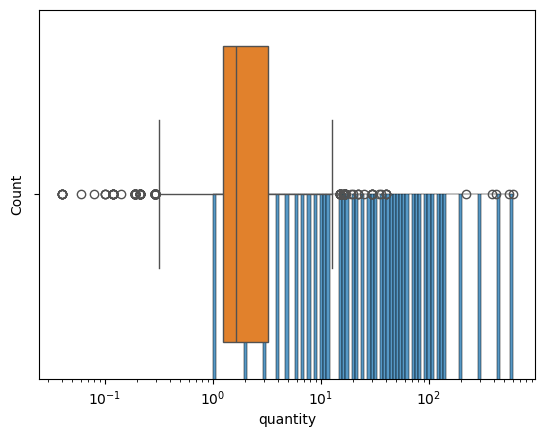

In [129]:
sns.histplot(df_germany["quantity"], log_scale=True)
sns.boxplot(x=df_germany["unit_price"])

### Defining Outlier Threshold & Filtering 

In [130]:
q_percentiles = df_germany["quantity"].quantile([0.01, 0.99])
print(q_percentiles)

0.01     1.0
0.99    96.0
Name: quantity, dtype: float64


In [131]:
qty_upper = df_germany["quantity"].quantile(0.99)
df_clean = df_germany[df_germany["quantity"] <= qty_upper].copy()

In [132]:
p_percentiles = df_clean["unit_price"].quantile([0.01, 0.99])
print(p_percentiles)

0.01     0.21
0.99    12.75
Name: unit_price, dtype: float64


In [133]:
price_upper = df_clean["unit_price"].quantile(0.99)
df_clean = df_clean[df_clean["unit_price"] <= price_upper].copy()

In [134]:
print("Önce:", df_germany.shape, "| Sonra:", df_clean.shape)

Önce: (8651, 8) | Sonra: (8502, 8)


In [136]:
top10 = (
    df_clean
    .groupby("description")["quantity"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
top10_df = top10.reset_index().rename(columns={"quantity":"total_sold"})
print(top10_df)

                           description  total_sold
0  ROUND SNACK BOXES SET OF4 WOODLAND         1221
1      PACK OF 72 RETROSPOT CAKE CASES        1002
2               WOODLAND CHARLOTTE BAG         920
3     PLASTERS IN TIN WOODLAND ANIMALS         856
4               JAM MAKING SET PRINTED         816
5             REGENCY CAKESTAND 3 TIER         809
6       PLASTERS IN TIN CIRCUS PARADE          774
7                       FUNKY DIVA PEN         768
8               6 RIBBONS RUSTIC CHARM         735
9        RED TOADSTOOL LED NIGHT LIGHT         728


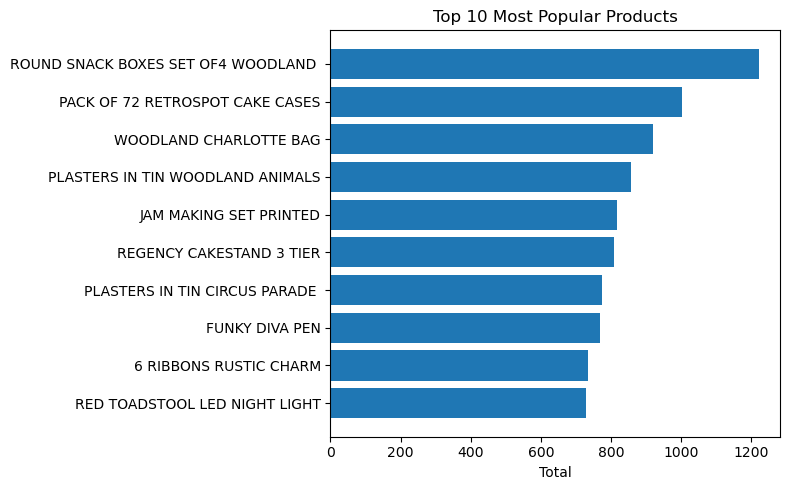

In [137]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.barh(top10_df["description"][::-1], top10_df["total_sold"][::-1])
plt.title("Top 10 Most Popular Products")
plt.xlabel("Total")
plt.tight_layout()
plt.show()


In [138]:
df_clean["revenue"] = df_clean["quantity"] * df_clean["unit_price"]

In [139]:
df_clean["date"] = pd.to_datetime(df_clean["invoice_date"].dt.date)
daily_rev = (
    df_clean
    .groupby("date")["revenue"]
    .sum()
    .reset_index()
)


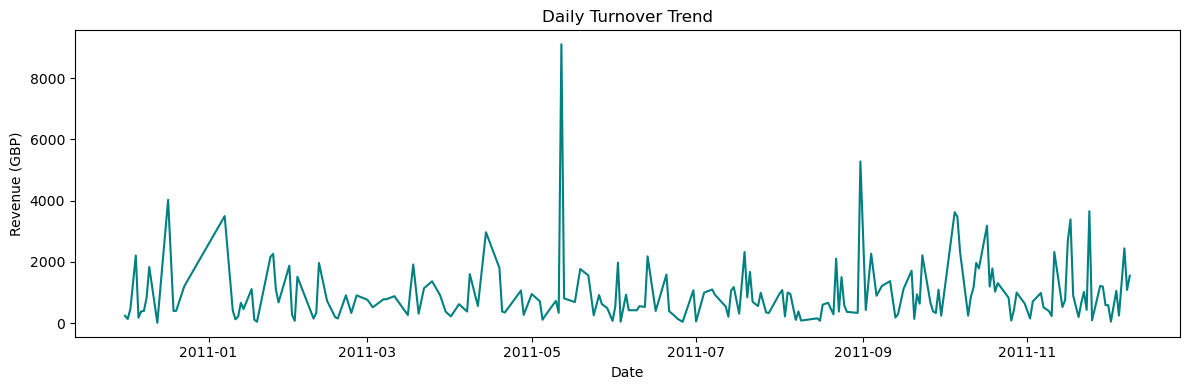

In [140]:
plt.figure(figsize=(12,4))
plt.plot(daily_rev["date"], daily_rev["revenue"], color="teal")
plt.title("Daily Turnover Trend")
plt.ylabel("Revenue (GBP)")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

In [141]:
df_clean.head()

,invoice,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,revenue,date
0,536527,22809,SET OF 6 T-LIGHTS SANTA,6,2010-12-01 13:04:00,2.95,12662.0,Germany,17.7,2010-12-01
1,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,2010-12-01 13:04:00,2.55,12662.0,Germany,15.3,2010-12-01
2,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,2010-12-01 13:04:00,0.85,12662.0,Germany,10.2,2010-12-01
3,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,2010-12-01 13:04:00,1.65,12662.0,Germany,19.8,2010-12-01
4,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,2010-12-01 13:04:00,1.95,12662.0,Germany,23.4,2010-12-01


In [144]:
cart = (
    df_clean
    .groupby(["invoice","description"])["quantity"]
    .sum()
    .unstack(fill_value=0)
)

In [145]:
print(cart.shape)
cart.head()

(439, 1666)


description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
invoice,,,,,,,,,,,,,,,,,,,,,
536527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [158]:
df_raw = load_raw_retail_data(file_path=str(ROOT/"data"/"online_retail_II.xlsx"))
print(df_raw.shape)
print(df_raw["StockCode"].str.upper().eq("POST").any())  # False dönmeli

(541910, 8)
True
